In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
 # let's see if we have any missing data
missing_values = df.isnull().sum()
summary = df.describe(include = 'all')

missing_values, summary

(Unnamed: 0             0
 Age                    2
 Gender                 2
 Education Level        3
 Job Title              2
 Years of Experience    3
 Salary                 5
 Country                0
 Race                   0
 dtype: int64,
          Unnamed: 0          Age Gender    Education Level          Job Title  \
 count   6704.000000  6702.000000   6702               6701               6702   
 unique          NaN          NaN      3                  7                193   
 top             NaN          NaN   Male  Bachelor's Degree  Software Engineer   
 freq            NaN          NaN   3674               2267                518   
 mean    3351.500000    33.620859    NaN                NaN                NaN   
 std     1935.422435     7.614633    NaN                NaN                NaN   
 min        0.000000    21.000000    NaN                NaN                NaN   
 25%     1675.750000    28.000000    NaN                NaN                NaN   
 50%     3351

In [4]:
#Fill missing values

# The mean is used to impute the numeric feature
for column in ['Age', 'Years of Experience', 'Salary'] :
    df[column].fillna(df[column].mean(), inplace= True)

# The mode is used to impute the numeric feature
for column in ['Gender', 'Education Level', 'Job Title'] :
    df[column].fillna(df[column].mode()[0], inplace= True)

In [5]:
#Check for missing values agein
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [6]:
df.dtypes

Unnamed: 0               int64
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [7]:
# Change data type of columns

df['Age'] = df['Age'].astype('int64')
df['Years of Experience'] = df['Years of Experience'].astype('int64')
df['Salary'] = df['Salary'].astype('int64')

In [8]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15,150000,Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
4,4,52,Male,Master's,Director,20,200000,USA,Asian


In [9]:
df.drop_duplicates()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15,150000,Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
4,4,52,Male,Master's,Director,20,200000,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49,Female,PhD,Director of Marketing,20,200000,UK,Mixed
6700,6700,32,Male,High School,Sales Associate,3,50000,Australia,Australian
6701,6701,30,Female,Bachelor's Degree,Financial Manager,4,55000,China,Chinese
6702,6702,46,Male,Master's Degree,Marketing Manager,14,140000,China,Korean


In [10]:
# Top 10 Highest Salary
df.sort_values(by = 'Salary', ascending=False).head(10)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
30,30,50,Male,Bachelor's,CEO,25,250000,Canada,Asian
83,83,52,Male,PhD,Chief Technology Officer,24,250000,Canada,Black
5001,5001,45,Male,Bachelor's Degree,Financial Manager,21,250000,Canada,Black
4351,4351,51,Male,PhD,Data Scientist,24,240000,Canada,Black
4336,4336,51,Male,PhD,Data Scientist,24,240000,USA,White
4291,4291,51,Male,PhD,Data Scientist,24,240000,UK,Welsh
4306,4306,51,Male,PhD,Data Scientist,24,240000,China,Korean
4321,4321,51,Male,PhD,Data Scientist,24,240000,China,Chinese
4276,4276,51,Male,PhD,Data Scientist,24,240000,Canada,Black
4381,4381,51,Male,PhD,Data Scientist,24,240000,Canada,Asian


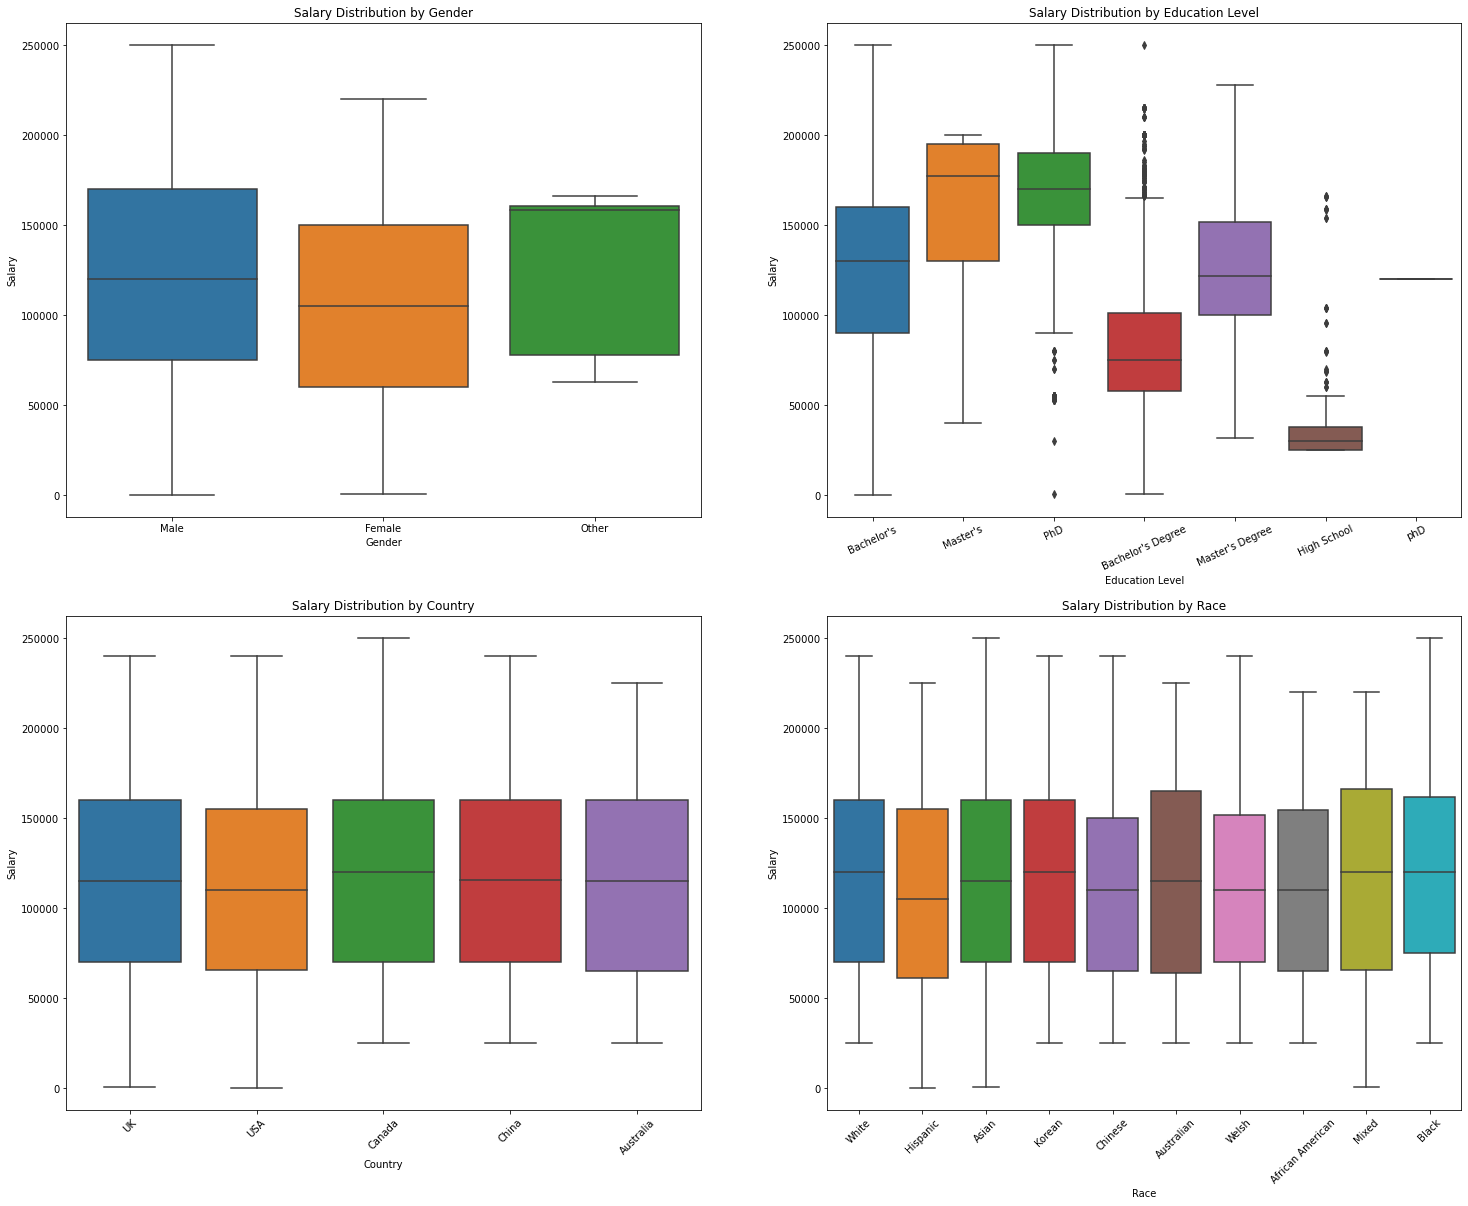

In [11]:
plt.figure(figsize=(25,20))
# Salary Distribution by Gender
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x= 'Gender', y= 'Salary')
plt.title('Salary Distribution by Gender')

# Salary Distribution by Eduxation Level
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Education Level', y = 'Salary')
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation= 25)

# Salary Distribution by Country
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x = 'Country', y ='Salary')
plt.title('Salary Distribution by Country')
plt.xticks(rotation= 45)

# Salary Distribution by Race
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x = 'Race', y ='Salary')
plt.title('Salary Distribution by Race')
plt.xticks(rotation= 45)

plt.show()

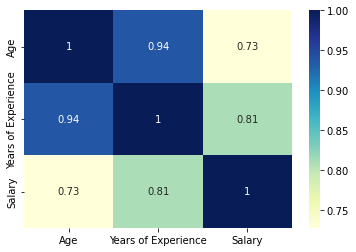

In [12]:
# Correlation Matrix between all numeric columns
corr = df[['Age', 'Years of Experience', 'Salary']].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

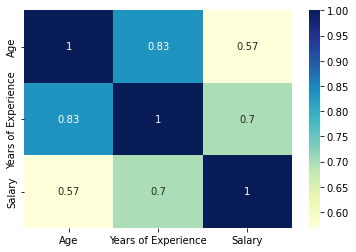

In [13]:
corr = df[['Age', 'Years of Experience', 'Salary']].corr(method='kendall')
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

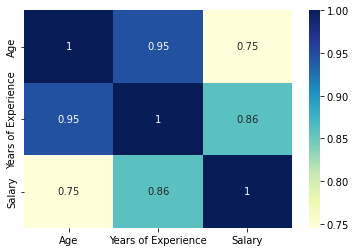

In [14]:
corr = df[['Age', 'Years of Experience', 'Salary']].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

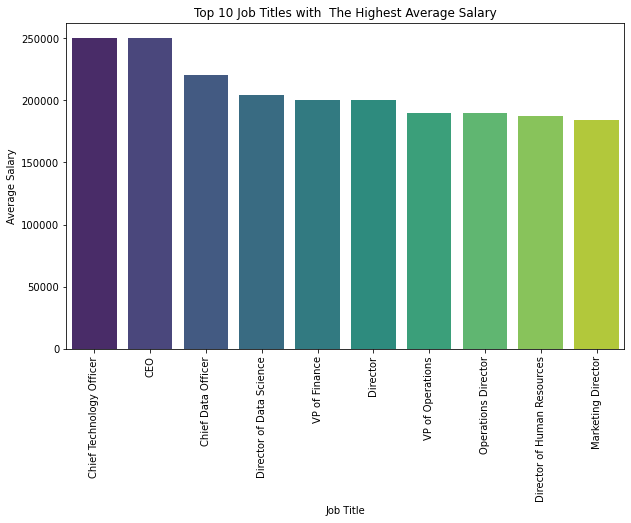

In [15]:
average_salary_by_job = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)

# Select top 10 job titles with highest average salary
top_10_jobs = average_salary_by_job[:10]

# Plot the average salary for top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette="viridis")
plt.title('Top 10 Job Titles with  The Highest Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

In [16]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [17]:
df['Education Level'] = df['Education Level'].str.lower()


In [18]:
df['Education Level'] = df['Education Level'].str.replace("bachelor's degree", "bachelor's")
df['Education Level'] = df['Education Level'].str.replace("master's degree", "master's")

In [19]:
df['Education Level'].unique()

array(["bachelor's", "master's", 'phd', 'high school'], dtype=object)

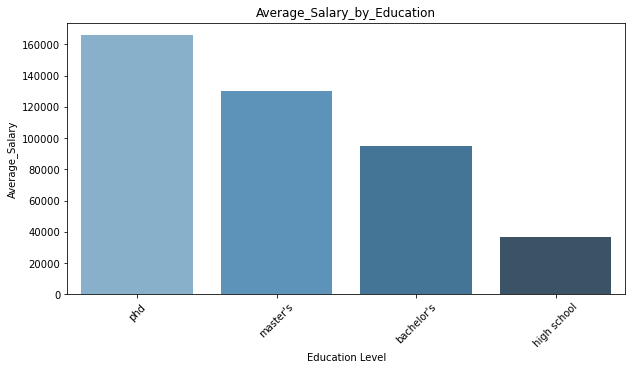

In [20]:
#Average_Salary_by_Education
Average_Salary_by_Education = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=Average_Salary_by_Education.index, y=Average_Salary_by_Education.values, palette="Blues_d")
plt.xlabel('Education Level')
plt.ylabel('Average_Salary')
plt.title('Average_Salary_by_Education')
plt.xticks(rotation= 45)
plt.show()

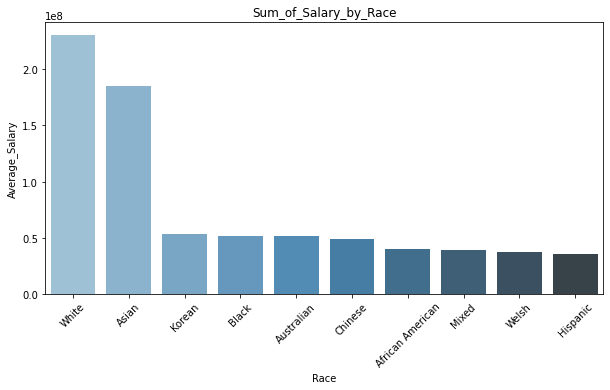

In [21]:
Sum_of_Salary_by_Race = df.groupby('Race')['Salary'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=Sum_of_Salary_by_Race.index, y=Sum_of_Salary_by_Race.values, palette="Blues_d")
plt.xlabel('Race')
plt.ylabel('Average_Salary')
plt.title('Sum_of_Salary_by_Race')
plt.xticks(rotation= 45)
plt.show()

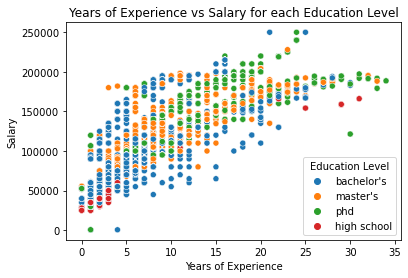

In [22]:
# Years of Experience vs Salary for each Education Level
sns.scatterplot(x='Years of Experience', y = 'Salary', data= df, hue=df['Education Level'])
plt.title("Years of Experience vs Salary for each Education Level")

plt.show()

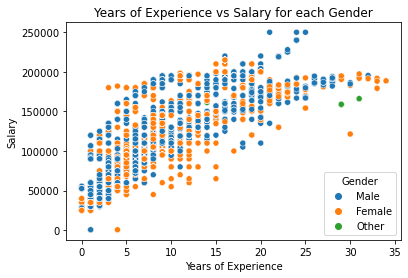

In [23]:
# Years of Experience vs Salary for each Gender
sns.scatterplot(x='Years of Experience', y = 'Salary', data= df, hue=df['Gender'])
plt.title("Years of Experience vs Salary for each Gender")

plt.show()

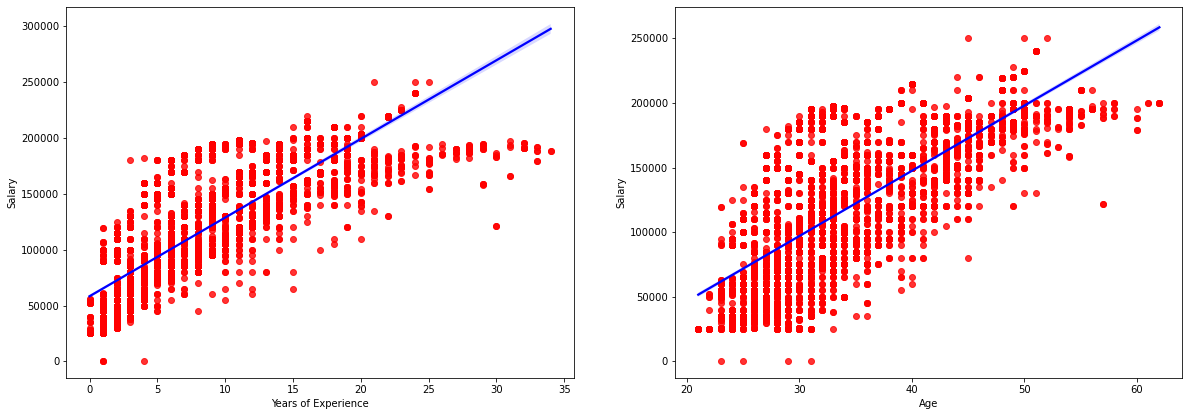

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.regplot(x='Years of Experience', y = 'Salary', data= df, scatter_kws={"color": "red"}, line_kws={"color" : "blue"})
plt.subplot(2, 2, 2)
sns.regplot(x='Age', y = 'Salary', data= df, scatter_kws={"color": "red"}, line_kws={"color" : "blue"})
plt.show()

In [25]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,1,0,177,5,90000,3,9
1,1,28,0,2,18,3,65000,4,5
2,2,45,1,3,145,15,150000,1,9
3,3,36,0,0,116,7,60000,4,5
4,4,52,1,2,26,20,200000,4,1
...,...,...,...,...,...,...,...,...,...
6699,6699,49,0,3,34,20,200000,3,7
6700,6700,32,1,1,116,3,50000,0,2
6701,6701,30,0,0,42,4,55000,2,4
6702,6702,46,1,2,97,14,140000,2,6


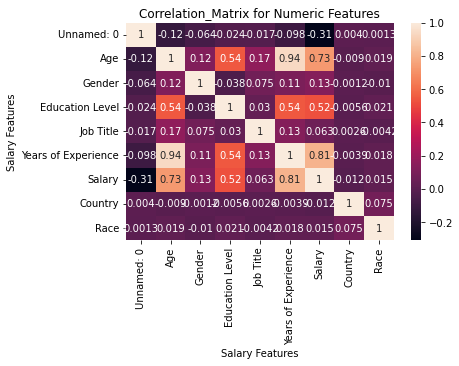

In [26]:
Correlation_Matrix = df_numerized.corr(method= 'pearson')
sns.heatmap(Correlation_Matrix, annot=True)
plt.title("Correlation_Matrix for Numeric Features")
plt.xlabel('Salary Features')
plt.ylabel('Salary Features')
plt.show()

In [29]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Unnamed: 0           Unnamed: 0             1.000000
                     Age                   -0.119030
                     Gender                -0.064031
                     Education Level       -0.023689
                     Job Title             -0.017317
                     Years of Experience   -0.098415
                     Salary                -0.307884
                     Country                0.004025
                     Race                   0.001329
Age                  Unnamed: 0            -0.119030
                     Age                    1.000000
                     Gender                 0.120630
                     Education Level        0.540417
                     Job Title              0.165900
                     Years of Experience    0.937544
                     Salary                 0.727986
                     Country               -0.008983
                     Race                   0.019046
Gender               Unnamed: 0            -0.

In [28]:
pd.set_option('display.max_rows', None)

In [30]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Unnamed: 0           Salary                -0.307884
Salary               Unnamed: 0            -0.307884
Unnamed: 0           Age                   -0.119030
Age                  Unnamed: 0            -0.119030
Unnamed: 0           Years of Experience   -0.098415
Years of Experience  Unnamed: 0            -0.098415
Unnamed: 0           Gender                -0.064031
Gender               Unnamed: 0            -0.064031
Education Level      Gender                -0.037788
Gender               Education Level       -0.037788
Education Level      Unnamed: 0            -0.023689
Unnamed: 0           Education Level       -0.023689
Job Title            Unnamed: 0            -0.017317
Unnamed: 0           Job Title             -0.017317
Country              Salary                -0.012084
Salary               Country               -0.012084
Gender               Race                  -0.009998
Race                 Gender                -0.009998
Age                  Country               -0.

In [31]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Salary               Education Level        0.524365
Education Level      Salary                 0.524365
Age                  Education Level        0.540417
Education Level      Age                    0.540417
                     Years of Experience    0.542673
Years of Experience  Education Level        0.542673
Age                  Salary                 0.727986
Salary               Age                    0.727986
                     Years of Experience    0.809054
Years of Experience  Salary                 0.809054
Age                  Years of Experience    0.937544
Years of Experience  Age                    0.937544
Unnamed: 0           Unnamed: 0             1.000000
Job Title            Job Title              1.000000
Salary               Salary                 1.000000
Years of Experience  Years of Experience    1.000000
Education Level      Education Level        1.000000
Gender               Gender                 1.000000
Age                  Age                    1.

In [ ]:
#The boxplot shows us that main difference of salary distribution is between salary and education level.  
#Correlation matrix with Pearson, Kendall and Spearman methods asserts that salary depends on years of experience.
#But with this matrix we can't see connection into categorical and numeric data. So that we make categorical data into numeric,
#And we discovered new correlation between salary and education level.